In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

<h2 id="reading_data">Reading the data in</h2>

In [26]:
df = pd.read_csv("FootfallData.csv")

# take a look at the dataset
df.head()

,Store_ID,Metratura_scaled,FTE_scaled,PTE_scaled,QAC_Oct_scaled,QAC_Nov_scaled,QAC_Dec_scaled,QAC_Jan_scaled,QAC_Feb_scaled,QAC_Mar_scaled,...,night_MEAN_scaled_ARPU_1000,night_MIN_scaled_ARPU_1000,night_MAX_scaled_ARPU_1000,midday_MEAN_scaled_ARPU_1000,midday_MIN_scaled_ARPU_1000,midday_MAX_scaled_ARPU_1000,weekend_MEAN_scaled_ARPU_1000,weekend_MIN_scaled_ARPU_1000,weekend_MAX_scaled_ARPU_1000,Footfall_classif
0,109,0.248963,0.375,0.0,0.041322,0.021407,0.166667,0.031250,0.050000,0.069767,...,0.394142,0.986070,0.049386,0.412237,1.000000,0.087235,0.521526,0.995580,0.691640,1
1,181,0.174274,0.375,0.8,0.033058,0.070336,0.000000,0.015625,0.050000,0.023256,...,0.400909,0.576339,0.163069,0.446382,0.668080,0.375562,0.462580,0.795810,0.394455,2
2,137,0.203320,0.375,0.0,0.090909,0.180428,0.012821,0.093750,0.116667,0.186047,...,0.292744,0.980967,0.744937,0.416422,0.988770,0.592596,0.365823,0.968131,0.740991,1
3,351,0.190871,0.375,0.0,0.074380,0.018349,0.000000,0.109375,0.133333,0.093023,...,0.414978,0.975537,0.402787,0.453379,0.984467,0.270401,0.511280,0.990444,0.394455,1
4,122,0.145228,0.375,0.0,0.008264,0.021407,0.025641,0.031250,0.016667,0.069767,...,0.206086,0.975620,0.148472,0.286770,0.992327,0.275639,0.283948,0.988803,0.136880,2


<h2 id="data_exploration">Data Exploration</h2>

Lets first have a descriptive exploration on our data.

In [27]:
# summarize the data
df.describe()

,Store_ID,Metratura_scaled,FTE_scaled,PTE_scaled,QAC_Oct_scaled,QAC_Nov_scaled,QAC_Dec_scaled,QAC_Jan_scaled,QAC_Feb_scaled,QAC_Mar_scaled,...,night_MEAN_scaled_ARPU_1000,night_MIN_scaled_ARPU_1000,night_MAX_scaled_ARPU_1000,midday_MEAN_scaled_ARPU_1000,midday_MIN_scaled_ARPU_1000,midday_MAX_scaled_ARPU_1000,weekend_MEAN_scaled_ARPU_1000,weekend_MIN_scaled_ARPU_1000,weekend_MAX_scaled_ARPU_1000,Footfall_classif
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,192.658385,0.208861,0.365489,0.100621,0.100380,0.160522,0.103201,0.163189,0.136646,0.154918,...,0.278045,0.968318,0.149500,0.338360,0.981298,0.181923,0.341015,0.966952,0.267531,1.003106
std,117.733561,0.101377,0.171945,0.186289,0.081734,0.134799,0.085142,0.122105,0.106769,0.121043,...,0.149097,0.111067,0.143388,0.155155,0.087566,0.194507,0.161974,0.096785,0.203285,0.818396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001723,0.000000,0.000000,0.018379,0.000000,0.000000,0.004686,0.000000,0.000804,0.000000
25%,90.250000,0.149378,0.250000,0.000000,0.057851,0.052752,0.051282,0.093750,0.066667,0.069767,...,0.182936,0.980153,0.042903,0.229656,0.989236,0.041462,0.238700,0.978500,0.109562,0.000000
50%,185.000000,0.186722,0.375000,0.000000,0.090909,0.114679,0.089744,0.140625,0.116667,0.139535,...,0.267250,0.992364,0.101220,0.342079,0.997910,0.105868,0.343422,0.992695,0.220816,1.000000
75%,293.750000,0.248963,0.500000,0.200000,0.132231,0.247706,0.141026,0.203125,0.166667,0.209302,...,0.365328,0.995136,0.206804,0.424756,1.000000,0.249573,0.442108,0.998141,0.372487,2.000000
max,402.000000,0.842324,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.744937,1.000000,1.000000,1.000000,1.000000,1.000000,0.993224,2.000000


<h2 id="understanding_data">Understanding the Data</h2>

### The 'FootfallData.csv' file:

The dataset describes the profiles of VF customers nearby the Vodafone stores and the stores’ characteristics. 

The variables provided are:
- **Localita_encoded**  
Geographical: town  
- **Provincia_encoded**  
Geographical: province  
- **Tipologia_encoded**   
Store type, which is a VF label to describe whether the store is a TOP performer, whether is located in a shopping mall, etc.
- **area_encoded**   
Geographical: VF area
- **FTE_scaled**   
Number of employees: FTE (full time equivalent)
- **PTE_scaled**   
Number of employees: PTE(part time equivalent)
- **SM si/no_encoded**   
Number of employees: store manager
- **Metratura_scaled**   
VF store square meters
- **QAC_Oct;Nov;Dec;Jan;Feb;Mar_scaled**   
Monthly number of tickets opened for phone assistance (known as QAC) by the store
- **TNPS_Oct;Nov;Dec;Jan;Feb_scaled**   
Monthly TNPS, which is the grade given by VF customers, who visited the store, about the store itself and its services, employees, etc.
- **night_Fixed_CB_%_scaled_200;500;1000**   
Nightly Fixed line CB size, which is the number of VF customer swith a VF fixed line contract living nearby the VF store
- **midday_Fixed_CB_%_scaled_200;500;1000**   
Daily Fixed line CB size, which is the number of VF customer swith a VF fixed line contract working nearby the VF store
- **CB_Night_scaled_200;500;1000**   
Nightly CB size, which are the number of VF customers living nearby the VF store
- **CB_Midday_scaled_200;500,1000**   
Daily CB size, which are the number of VF customers working close by the VF store
- **CB_Weekend_scaled_200;500;1000**   
Weekend CB size, which is the average number of VF customers passing by the VF store on the weekend
- **night_MEAN;MIN;MAX_scaled_ARPU_200;500;1000**   
Average, min and max night ARPU(Average revenue per user) for the store CBs
- **midday_MEAN;MIN:MAX_scaled_ARPU_200;500;1000**   
Average, min and max daily ARPU for the store CBs
- **weekend_MEAN;MIN;MAX_scaled_ARPU_200;500;1000**   
Average, min and max weekend ARPU for the store CBs

*Note: some of the variable is provided considering the CB detected in a circle with radius of 200, 500 and 1000 meters and centred on the VF store, i.e. three values are provided*

The hist graphs below are clear to show the distribution of each variable.

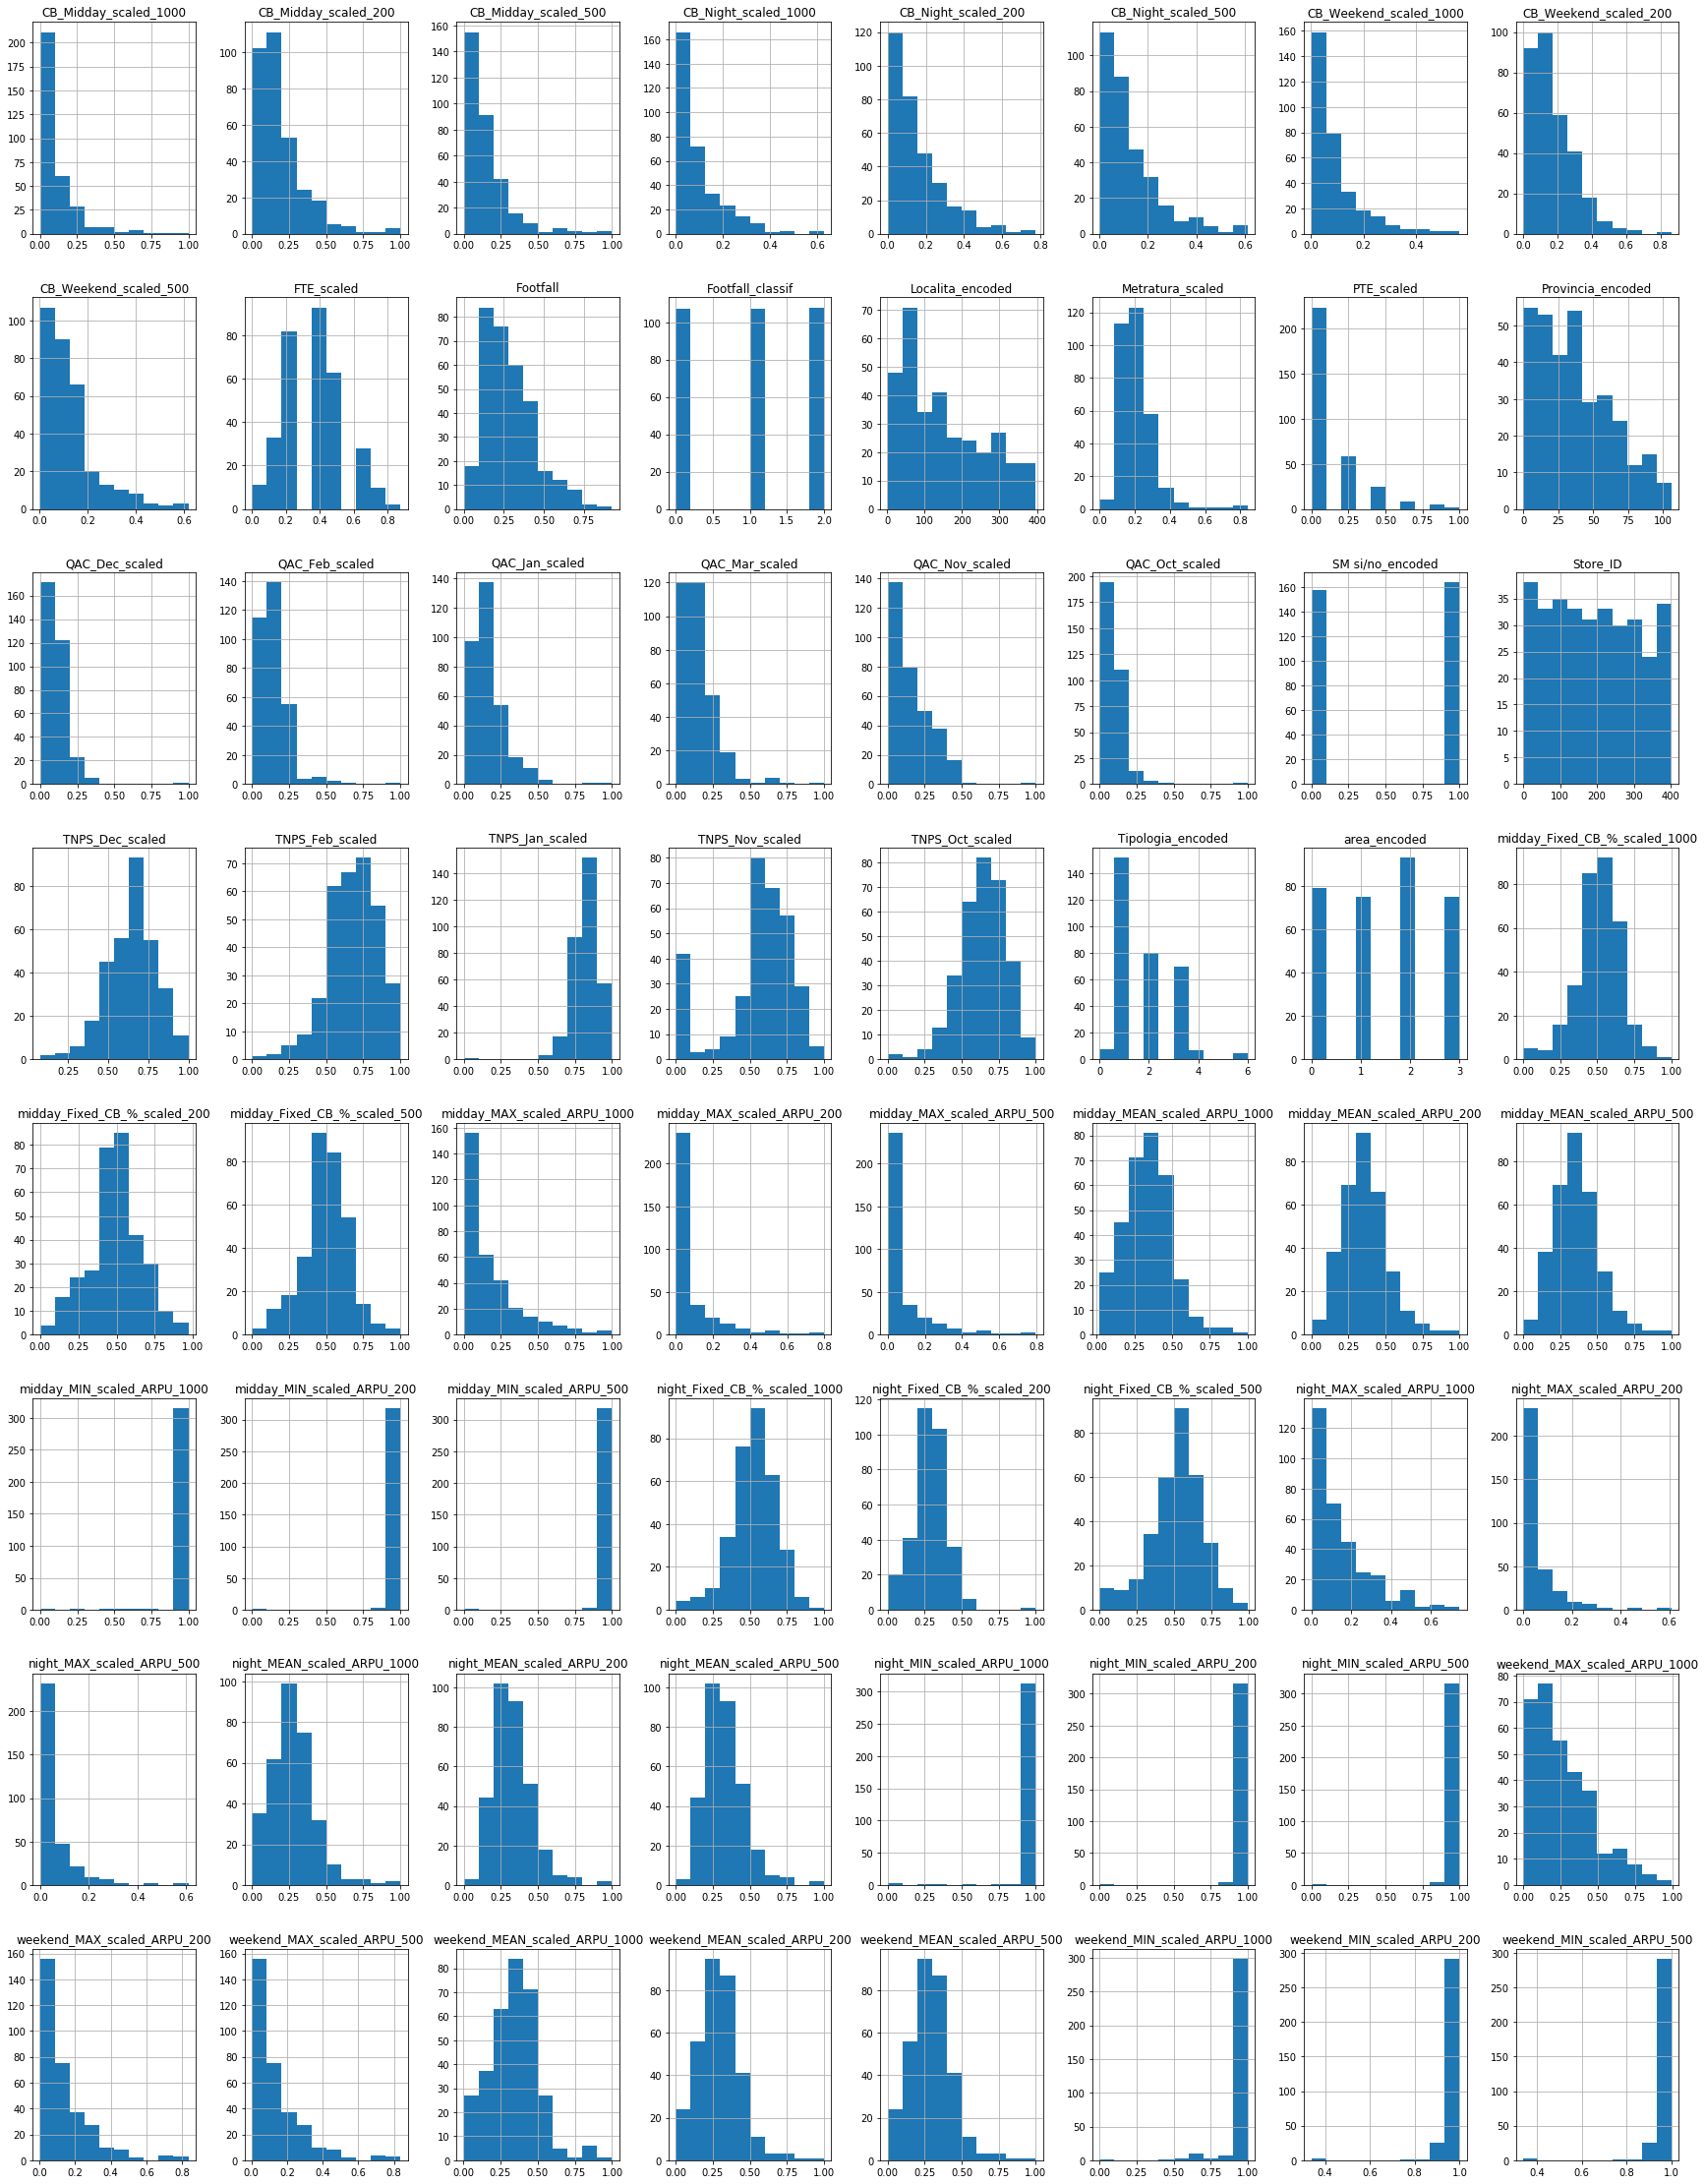

In [29]:
fig = plt.figure(figsize = (30,40))
ax = fig.gca()
df.hist(ax = ax)
plt.show()